# Imports

Before we can do anything, we gotta do the imports...

In [1]:
import pandas as pd
import numpy as np
%matplotlib inline
import matplotlib.pyplot as plt
import geopandas as gpd

speed_humps_data = pd.read_csv("Speed-Humps.csv")

## Data

Now that we have all of our tools in our bag, let's look at the first five columns of our data to see what we're working with

In [2]:
speed_humps_data.head()

,id,hump_id,locator_address_number,locator_street,pavement,speed_hump_material,neighborhood,council_district,ward,tract,public_works_division,pli_division,police_zone,fire_zone,latitude,longitude
0,430808404,1,4337.0,Saline St,9257,Asphalt,Squirrel Hill South,5,14,42003141400,3,14,4,2-15,40.419835,-79.926062
1,1520886592,2,NaN,Summerset Dr,15346,NaN,Squirrel Hill South,5,14,42003141400,3,14,4,2-20,40.425040,-79.912040
2,858537521,3,511.0,Gold Way,1755,Asphalt,North Oakland,6,5,42003562000,3,5,4,2-23,40.456746,-79.954521
3,297775878,4,547.0,Gold Way,1755,Asphalt,North Oakland,6,5,42003562000,3,5,4,2-23,40.457333,-79.954899
4,1061197751,5,593.0,Gold Way,1755,Asphalt,North Oakland,6,5,42003562000,3,5,4,2-23,40.458061,-79.955355


With this dataset, there's not a column that says "speed hump count" or anything, so it doesn't really tell us about the total amount of speed humps each neighborhood has (which is what we really want). So I'll filter for the "neighborhood" column, and see how many entries each neighborhood has by using the \'value_counts\' function.

In [3]:
speed_humps_data['neighborhood'].value_counts()

Squirrel Hill South    18
Carrick                 9
Polish Hill             6
North Oakland           6
Brookline               4
Upper Hill              4
Perry North             4
Homewood South          4
South Side Slopes       4
Bloomfield              3
Garfield                3
Mount Washington        3
Squirrel Hill North     3
South Side Flats        3
Highland Park           2
Central Oakland         1
Stanton Heights         1
Overbrook               1
Name: neighborhood, dtype: int64

# Visuals

Now that I have the nice and filtered data, I want to see it visually. 

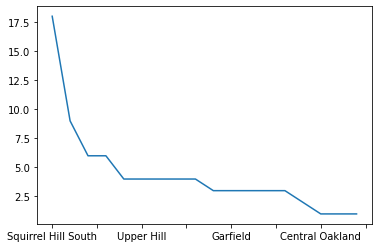

In [5]:
speed_humps_data['neighborhood'].value_counts().plot()

This is an ok way of looking at it, but still not great...
I'll try the ".bar" function:

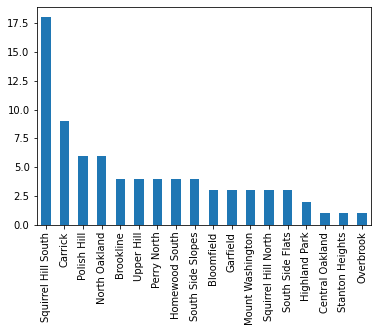

In [6]:
speed_humps_data['neighborhood'].value_counts().plot.bar()

Perfect.

# GeoMap

First I'll import the neighborhoods map.

In [28]:
neighborhoods = gpd.read_file("Neighborhoods/Neighborhoods_.shp")

Now I have to make a new dataframe so I can merge it with the neighborhoods map.

In [22]:
hump_hoods = speed_humps_data['neighborhood'].value_counts().reset_index().rename({'index' : 'neighborhood', 'neighborhood' : 'count'}, axis=1)
hump_hoods

,neighborhood,count
0,Squirrel Hill South,18
1,Carrick,9
2,Polish Hill,6
3,North Oakland,6
4,Brookline,4
5,Upper Hill,4
6,Perry North,4
7,Homewood South,4
8,South Side Slopes,4
9,Bloomfield,3


Now I merge...

In [9]:
speed_humps_map = neighborhoods.merge(hump_hoods, how='left', left_on = 'hood', right_on = 'neighborhood')

Now I plot and visulaize:

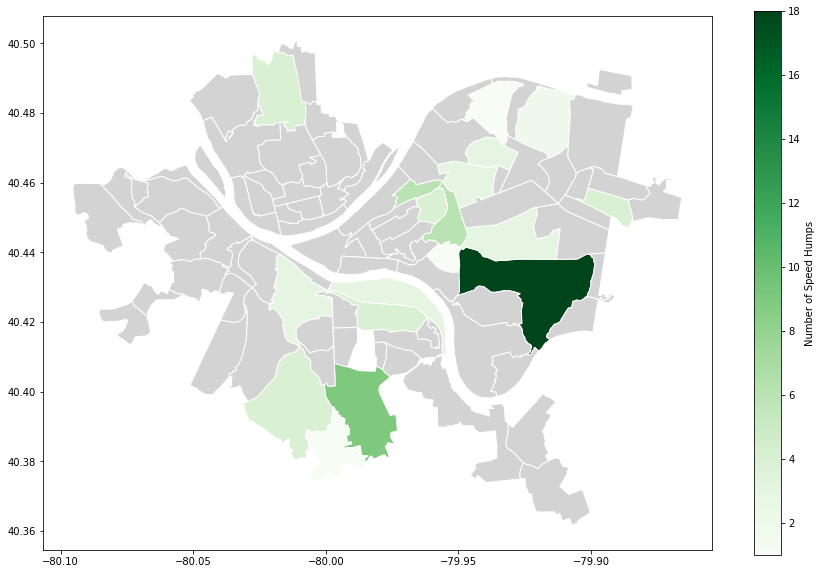

In [27]:
speed_humps_map.plot(column = 'count', 
               cmap = 'Greens',              
               edgecolor = "white",       
               legend = True,             
               legend_kwds = {'label': "Number of Speed Humps"},
               figsize = (15, 10),        
               missing_kwds = {"color": "lightgrey"})

## Conclusion

Through the use of pandas, I was able to extrapulate some useful data and display it visually. So if you're a fan of speed humps, Squirrel Hill South is the neighborhood you want to live in. And if you don't like them, maybe live in Central Oakland or any of the neighborhoods without any. But as for our overall metric of safest neighborhood to drive in, purely looking at the total amount speed bumps each one has, it would be Squirrel Hill South, which has double the amount of second place. I did not weigh any of these variables or factors based on size or population because I just wanted to look at the pure amount of speed bumps, no matter the area or amount of people each neighborhood has.